In [ ]:
 
 
import requests
from bs4 import BeautifulSoup
import time,re,csv
import random
import requests
from datetime import datetime
import pandas as pd
 
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36',
}
def get_news_contents(url,mode='娛樂'):
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    [s.extract() for s in soup('script')]#移除script style
    [s.extract() for s in soup('ul')]#移除ul
    [s.extract() for s in soup("svg")]#移除svg
 
    
    results = soup.select("article")
    content = ''
 
    for result in results:
        content+=result.text
    return ' '.join(re.sub('[^\u4e00-\u9fa5^.^a-z^A-Z^0-9]', " ", content).split())#保留中英數 一個空格
 
def write_to_csv(news_data,mode='娛樂'):
    pd.DataFrame([news_data]).to_csv('/content/drive/MyDrive/Colab Notebooks/%s.csv'%(mode), names=['title', 'titleLink', 'content', 'label'],index=0)    
 
def get_news(num=10,mode='娛樂'):
    all_news = []
 
    if mode=='要聞':
        pid = '5043686'
    elif mode=='全球':
        pid = '5039899'
    else:
        pid = ''
    next_index = -1
    try:
      while len(all_news) < num:
        news_types={'全球': f'https://www.nownews.com/nn-client/api/v1/cat/news-global/?pid={pid}',
                    '運動': f'https://www.nownews.com/nn-client/api/v1/cat/sport/?pid={pid}',
                    '財經': f'https://www.nownews.com/nn-client/api/v1/cat/finance/?pid={pid}',
                    '房產': f'https://www.nownews.com/nn-client/api/v1/cat/house2/?pid={pid}',
                    '健康': f'https://www.nownews.com/nn-client/api/v1/cat/health-life/?pid={pid}',
                    '地方': f'https://www.nownews.com/nn-client/api/v1/cat/local/?pid={pid}',
                    '新奇': f'https://www.nownews.com/nn-client/api/v1/cat/novelty/?pid={pid}',
                    '要聞': f'https://www.nownews.com/nn-client/api/v1/cat/news-summary/?pid={pid}'}
 
        url = news_types[mode]
        print(url)
        r = requests.get(url, headers=HEADERS)
        if r.status_code != requests.codes.ok:
            print(f'Requests Error: {r.status_code}')
            break
 
        data = r.json()
        if data['data'] == []:
            next_index -= 1
            pid = all_news[next_index]['id']
            if next_index < -5:
                 raise Exception("next_index已經到達極限.")
            continue
        else:
            next_index = -1
 
 
        news_list = data['data']['newsList']
        
        for news in news_list:
              
              news_data = {
                'id':news['id'],
                'titleLink': 'https://www.nownews.com' + news['postOnlyUrl'],
                'title': ' '.join(re.sub('[^\u4e00-\u9fa5^.^a-z^A-Z^0-9]', " ", news['postTitle']).split()),
                'content': get_news_contents('https://www.nownews.com' + news['postOnlyUrl'],mode),
                'label':mode
              }
 
              write_to_csv(news_data,mode)
              all_news.append(news_data)
              
           
        
        pid = all_news[next_index]['id']
        time.sleep(random.uniform(2, 3))
    except:
      print('下一個分類')
 
 
if __name__ == "__main__":
    get_news(num=6000,mode='全球')
    get_news(num=6000,mode='要聞')

https://www.nownews.com/nn-client/api/v1/cat/news-global/?pid=5039899
下一個分類
https://www.nownews.com/nn-client/api/v1/cat/news-summary/?pid=5043686
下一個分類


**# Read**


In [ ]:
import pandas as pd
def read_from_csv(mode='娛樂'):
    return pd.read_csv('/content/drive/MyDrive/Colab Notebooks/%s.csv'%(mode), names=['title', 'titleLink', 'content', 'label'], header=0)

newlist = pd.concat([read_from_csv('娛樂'),read_from_csv('全球'),read_from_csv('要聞'),read_from_csv('運動'),read_from_csv('房產'),read_from_csv('健康'),read_from_csv('財經')
,read_from_csv('新奇'),read_from_csv('地方')],axis=0)

newlist.sample(frac=1)


,title,titleLink,content,label
8359,周慧敏曝舊照驚喊 沒看過 網大讚 以為是林志玲,https://stars.udn.com/star/story/10089/4801427...,玉女掌門人 周慧敏出道至今已34年 近日她曝光一張23年前在台灣所拍攝的雜誌封面照 驚訝地說...,娛樂
6289,無人電梯 不停開關門 男怕爆不敢搭 網愣 搞錯了吧,https://www.nownews.com/news/5054054,農曆7月 也就是俗稱的 鬼月 已經到來 家裡的長輩也會叮嚀要注意的禁忌 不過還是有些人擔心會...,新奇
4194,該不該恢復兩年徵兵制 律師曝 關鍵 國家準備好了嗎,https://www.nownews.com/news/5079055,面對近期共軍不斷越過海峽中線擾台 對於台灣兵役制度的討論也再度躍登檯面 更有不少政治人物提出...,要聞
10709,NBA 單場僅得79分 勇士寫下科爾時代次低紀錄,https://www.nownews.com/news/3793552,儘管主力中鋒Kevon Looney回歸 但是金州勇士在今 3 日的比賽 還是以79 104...,運動
4391,王瑋 后翼棄兵 在男人稱霸世界中脫穎而出的天才少女,https://stars.udn.com/star/story/10093/5015351...,經過幾年的發展 網劇 儼然成為一個獨特的 劇種 與 操作 后翼棄兵 正是如此 每集紮紮實實約...,娛樂
...,...,...,...,...
2822,中埔舊驗菸廠改建 嘉縣首間多功能長照園區動土,https://www.nownews.com/news/5108368,佔地廣闊 位於中埔鄉農會隆興辦事處旁的舊菸葉檢驗廠閒置多年 經鄉公所爭取衛福部補助 自籌經費...,地方
9393,熊本熊翻跳 乘風破浪的姐姐 主題曲扭很大 萌樣滿分超療癒,https://stars.udn.com/star/story/120661/474521...,大陸女星李宇春為綜藝節目 乘風破浪的姐姐 創詞並演唱的主題曲 無價之姐 不僅有明星 網紅等人...,娛樂
8061,我們一家人 紐西蘭浪人落腳頭城 因思念開起麵包店,https://stars.udn.com/star/story/10091/4817119...,來自紐西蘭的Daniel 是一個逐浪而居的浪人 為了衝浪而落腳頭城 卻在這裡找到了另一半 甚...,娛樂
1606,別灰心 威力彩下期加碼送2億 頭獎獎金上看2.2億,https://www.nownews.com/news/5038097,威力彩今 27 晚開出頭獎 幸運得主有兩名 各分得15.6億元 為史上第8高單注頭獎 此次是...,財經


In [ ]:
newlist[newlist.content.str.len()>10000]

,title,titleLink,content,label
8168,金鐘55 第55屆電視金鐘獎完整入圍名單,https://stars.udn.com/star/story/10091/4811344...,圖 擷自廣播電視金鐘獎官方臉書 第55屆電視金鐘獎入圍名單26日揭曉 這次由獲得上屆 綜藝節...,娛樂


[]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_

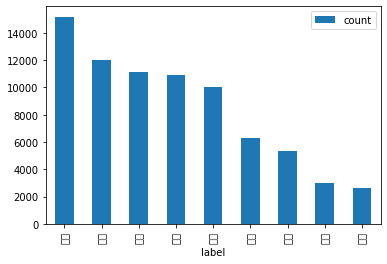

In [ ]:
import matplotlib.pyplot as plt
import matplotlib



df = newlist.label.value_counts().reset_index()
df.columns = ['label', 'count']
df.plot(x='label',y='count',kind='bar')
plt.plot()